# Classification

#### Dec 15, Classwork

In [52]:
from sklearn.datasets import fetch_mldata
# fetch_mldata downloads data in the file structure scikit_learn_data/mldata/mnist-original.mat 
# in your home directory.
# you can also copy from our dataset using rsync -avz /cxldata/scikit_learn_data .
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [2]:
mnist = fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

### 1.3.3 Looking at one of the data samples

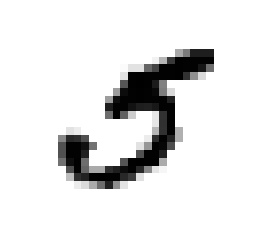

In [11]:
some_digit = X[36000]   # Selecting the 36,000th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [12]:
y[36000]

5.0

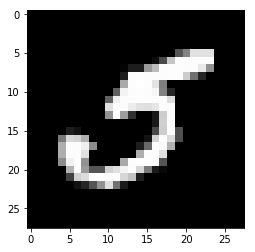

In [14]:
plt.imshow(255 - some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [19]:
np.random.seed(42)
shuffle_index = np.random.permutation(60000) # creating a shuffled index of 60000 values
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # Extracting values from the datasets based on shuffled indexes

In [23]:
df = pd.DataFrame(_test)[0].value_counts()
df

1.0    1135
2.0    1032
7.0    1028
3.0    1010
9.0    1009
4.0     982
0.0     980
8.0     974
6.0     958
5.0     892
Name: 0, dtype: int64

## Stochastic Gradient Declassifier SGD

In [29]:
#Stochastic gradient descent
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [31]:
sgd_clf = SGDClassifier(random_state=42, max_iter=10) # if you want reproducible results set the random_state value.
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=10, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [32]:
sgd_clf.predict([X[36000]])

array([ True])

In [35]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=10, scoring="accuracy") 
# Since we need 3 folds hence we will set sv to 3

array([0.95300783, 0.96866667, 0.967     , 0.961     , 0.95466667,
       0.95983333, 0.96333333, 0.96583333, 0.96966667, 0.96416069])

In [37]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9089 , 0.91045, 0.9096 ])

In [41]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

print ("Precision score is : " , precision_score(y_train_5, y_train_pred))
print ("Recall score is : " , recall_score(y_train_5, y_train_pred))

('Precision score is : ', 0.8091005291005291)
('Recall score is : ', 0.7052204390333887)


In [43]:
f1_score(y_train_5, y_train_pred)

0.7535974768381629

In [45]:
sgd_clf.decision_function?

In [46]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([35750.01845886])

In [47]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [48]:
# Setting the threshold to 20000
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [49]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")
len(y_scores)

60000

In [50]:
y_scores[560:600]

array([-105572.81230444, -350505.09393107, -262123.65158333,
        -26507.17872432, -555822.71317699, -507499.42558774,
       -436082.66394994, -610678.11181888, -430467.7122917 ,
       -430408.03633241, -116898.12733016,  241733.83933307,
       -425634.45834344,   33940.12912433, -304508.66999983,
       -424255.00353184, -285021.11516803, -319279.25546264,
       -270777.18937271, -459503.79467595, -346144.85861876,
       -166236.13066683,  -77181.54449579, -301299.16074919,
       -295212.23783916, -369631.5256678 , -103842.85786565,
       -196821.96753923, -174775.17939263, -266562.49058294,
       -393546.77233924,  -94660.04194841, -438245.81148896,
       -361193.49963781, -363770.43873243, -386745.63318427,
       -143299.41511393, -334188.34501149, -395867.9003221 ,
       -483395.59989242])

In [51]:
y_train[560:600]

array([3., 1., 6., 5., 0., 2., 6., 2., 2., 2., 0., 5., 2., 5., 2., 8., 3.,
       6., 8., 8., 9., 6., 5., 3., 0., 3., 0., 6., 2., 8., 7., 5., 4., 2.,
       9., 0., 3., 0., 6., 4.])

In [53]:
# Now we will use these values of y_scores to find different values for precison and recall for varying thresholds.
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [54]:
a = np.array([1,2,3])

In [55]:
len(precisions)

59908

In [56]:
print(len(recalls))
print(len(precisions))
print(len(thresholds))

59908
59908
59907


In [57]:
precisions[:-1]

array([0.09049026, 0.09047508, 0.09047659, ..., 1.        , 1.        ,
       1.        ])

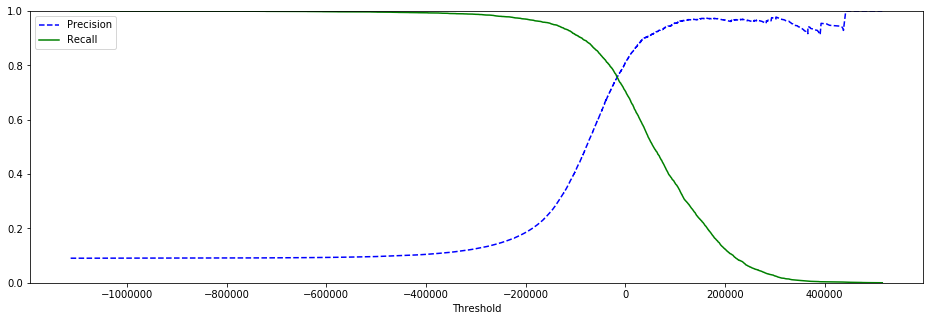

In [58]:
# Plotting our results

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(16,5))
    # Removing last value to avoid divide by zero in precision computation
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()